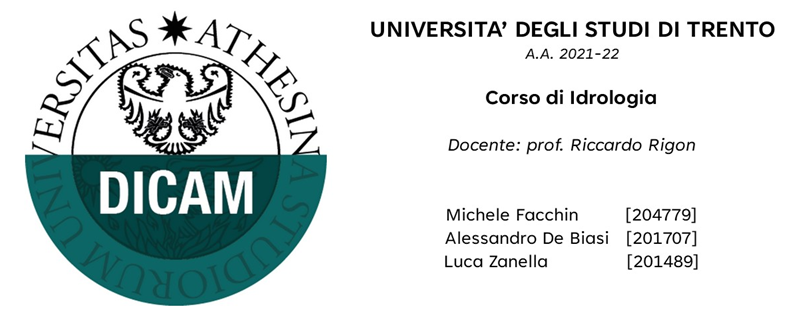

In [1]:
import os
from IPython.display import Image
whetgeo_project_path= os.path.dirname(os.getcwd())
Image(whetgeo_project_path+'\\Intestazione notebook.png')

# **Infiltrazione attraverso un terreno con due strati con pioggia**

### **Finalità** 

Analizzare l'infiltrazione attraverso un terreno composto da 2 strati (come in figura) sul quale piove ad una intensità di ## mm/h mantenuta per ## minuti.

Si ottengono e si rappresentano:

- Profilo verticale di SUZIONE
- Profilo verticale di CONTENUTO D'ACQUA
- Andamento nel tempo della SUZIONE a diverse profondità
- Andamento nel tempo del CONTENUTO D'ACQUA a diverse profondità
- Andamento nel tempo del FLUSSO D'ACQUA in superficie
- Andamento nel tempo del FLUSSO D'ACQUA sul fondo
- Andamento nel tempo del FLUSSO D'ACQUA cumulato in superficie
- Andamento nel tempo del FLUSSO D'ACQUA cumulato sul fondo

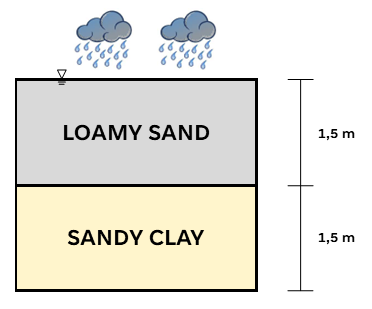

In [2]:
Image(whetgeo_project_path+'\\stratigrafia2.png')

### **Condizioni iniziali**

- Terreno saturo
- Distribuzione di pressione idrostatica


### **Condizioni al contorno**

- Fondo drenante
- Pioggia in superficie di ## mm/h per ## minuti

### **Modello utilizzato**

Le proprietà idrauliche del terreno sono definite dal modello di Van Genuchten

In [3]:
import os
import pandas as pd

from geoframepy.whetgeo1d import grid_creator
from geoframepy.whetgeo1d import grid_to_netcdf

import warnings
warnings.filterwarnings('ignore')

project_path = os.path.dirname(os.getcwd())

In [4]:
grid_input_file_name = project_path + "/data/Grid_input/E2_grid - Copia.csv"

ic_input_file_name = project_path + "/data/Grid_input/E2_ic - Copia.csv"

parameter_input_file_name = project_path + "/data/Grid_input/Richards_VG.csv"

dictionary_input_file_name = project_path + "/data/Grid_input/dictionary.csv"

grid_type = 'classical'

dz_min = -9999 # not required for grid_type = 'classical'

dz_max = -9999 # not required for grid_type = 'classical'

b = -9999      # not required for grid_type = 'classical'

psi_interp_model = "linear"

T_interp_model = "linear"

water_ponding_0 = -0.5

T_water_ponding_0 = 273.15

output_file_name =  project_path + "/data/Grid_NetCDF/E2_grid - Copia.nc"

output_title = '''Computational grid for ex03 WET initial condition.
                  '''
output_summary = '''
Type,eta,K,equationStateID,parameterID





'''

output_date = ''

output_institution = 'GEOframe'



In [5]:
data_grid = pd.read_csv(grid_input_file_name)

data_ic = pd.read_csv(ic_input_file_name)

data_parameter = pd.read_csv(parameter_input_file_name, comment='#')

data_dictionary = pd.read_csv(dictionary_input_file_name)

[KMAX, eta, eta_dual, space_delta, z, z_dual, control_volume] = grid_creator.grid1D(data_grid, dz_min, b, dz_max, grid_type, shallow_water=True)

[psi_0, T_0] = grid_creator.set_initial_condition(data_ic, eta, psi_interp_model, T_interp_model, water_ponding_0=water_ponding_0, T_water_ponding_0=T_water_ponding_0, shallow_water=True)

control_volume_index = grid_creator.calibration_point_index(data_grid, eta)

[equation_state_ID, parameter_ID, theta_s, theta_r, par_1, par_2, par_3, par_4,
par_5, alpha_ss, beta_ss, ks] = grid_creator.set_parameters_richards(data_grid, data_parameter, data_dictionary, KMAX, eta)

grid_to_netcdf.write_grid_netCDF_richards(eta, eta_dual, z, z_dual, space_delta, control_volume, control_volume_index, psi_0, T_0, equation_state_ID, parameter_ID, KMAX,
                  theta_s, theta_r, par_1, par_2, par_3, par_4, par_5, alpha_ss, beta_ss, ks,
                  output_file_name, output_title, output_institution, output_summary, output_date, grid_input_file_name, parameter_input_file_name)



***SUCCESS writing!  C:\Users\super\OMS_Project_WHETGEO1D_Idrologia_ay_21_22/data/Grid_NetCDF/E2_grid - Copia.nc


## POST PROCESSING

In [6]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.style as style 
import matplotlib.colors as cl
import matplotlib.dates as mdates
import matplotlib
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

style.available
style.use('seaborn-whitegrid')

nice_fonts = {
        "legend.frameon": True,
        "legend.fancybox": True,
        "legend.facecolor": "white",
        "axes.edgecolor": "0.8",
        "axes.linewidth": 0.6,
        "grid.linewidth":0.4,
        "text.usetex": False,
        "font.family": "serif",
        "axes.labelsize": 16,
        "font.size": 16,
        "legend.fontsize": 14,
        "xtick.labelsize": 14,
        "ytick.labelsize": 14,
}

my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#ece7f2","#d0d1e6","#a6bddb","#74a9cf","#3690c0","#0570b0","#045a8d","#023858"])
colors = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00'] #ColorBrewer

plt.rcParams.update(nice_fonts)

In [7]:
ds = xr.open_dataset(project_path + '/output/E2_wet_0000.nc')

In [8]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

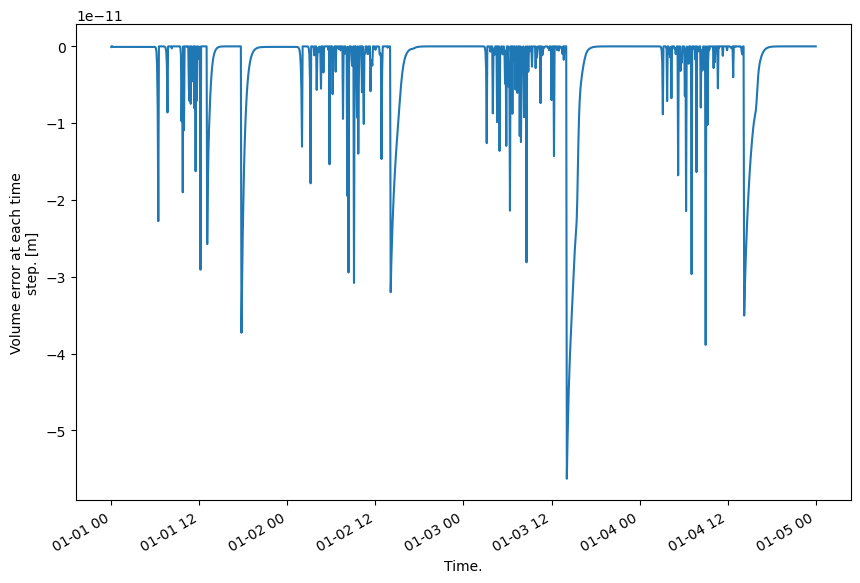

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10/1.618)) 
ds.error.plot(ax=ax)
plt.show()

In [10]:
from geoframepy.timeseries import io_csv

rain = io_csv.pandas_read_OMS_timeseries(project_path + '/data/Timeseries/E3_rain_var.csv',datetime_index=True)


In [11]:
d=len(rain)

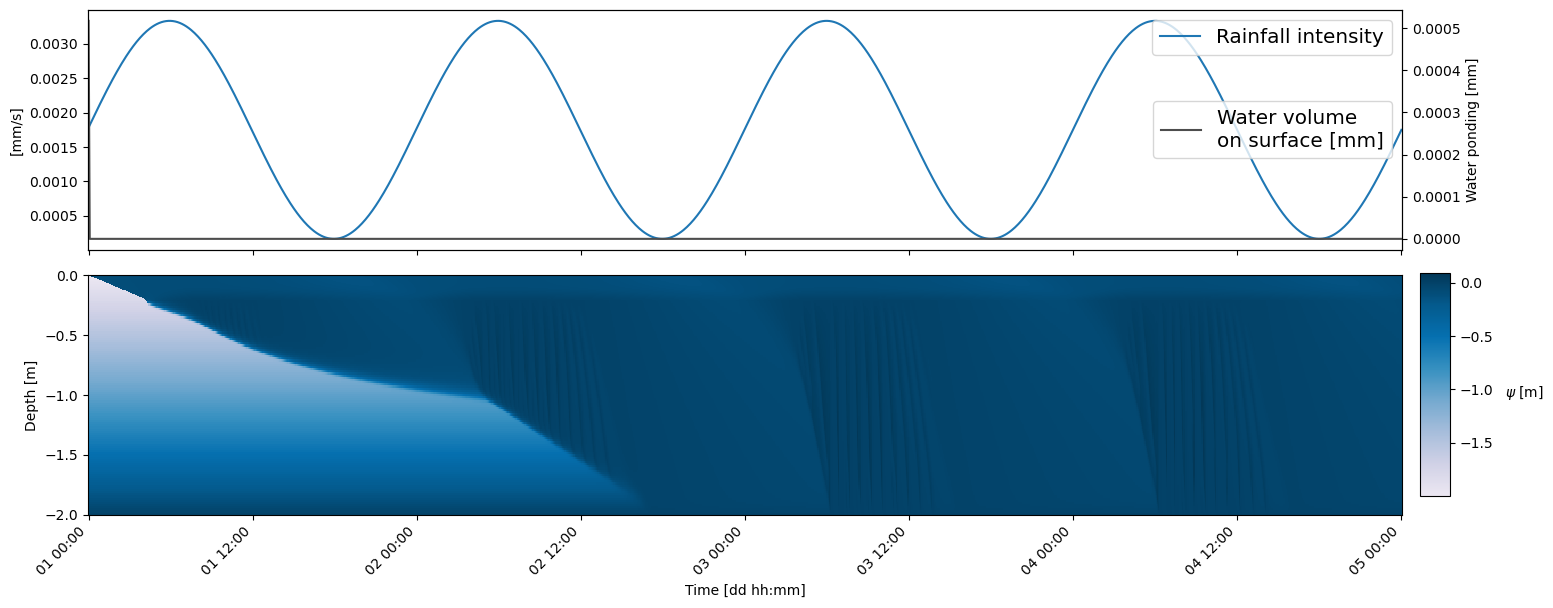

In [12]:
fig, ax = plt.subplots(2, 1, sharex='col', figsize=(15, 10/1.618)) 
norm = matplotlib.colors.Normalize(vmin=np.amin(ds.psi.values), vmax=np.amax(ds.psi.values))

ax[0].plot(ds.time.values, rain['0'][0:d]/300, label='Rainfall intensity') #conversione in mm/s
ax[0].legend(loc=1,fontsize='x-large')
ax[0].set_ylabel('[mm/s]')

ax1=ax[0].twinx()
ds.waterVolume.sel(depth=0.0, method='nearest').plot(ax=ax1,color='0.3',label='Water volume\non surface [mm]')
ax1.legend(loc=7,fontsize='x-large')
ax1.set_ylabel('Water ponding [mm]')
ax1.set_title(None)



a = ds.psi.plot(ax=ax[1], y='depth',add_colorbar=False, cmap=my_cmap, norm=norm)#, cbar_kwargs={'label': '$\psi$ [m]'})

ax[1].set_ylabel('Depth [m]')
ax[1].set_xlabel('Time [dd hh:mm]')


ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax[1].xaxis.set_tick_params(rotation=45)

cbar_ax = fig.add_axes([0.95, 0.19, 0.02, 0.36])
sm = plt.cm.ScalarMappable(cmap=my_cmap, norm=norm)
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label('$\\psi$ [m]', rotation=0, labelpad=22)

plt.tight_layout()
plt.show()

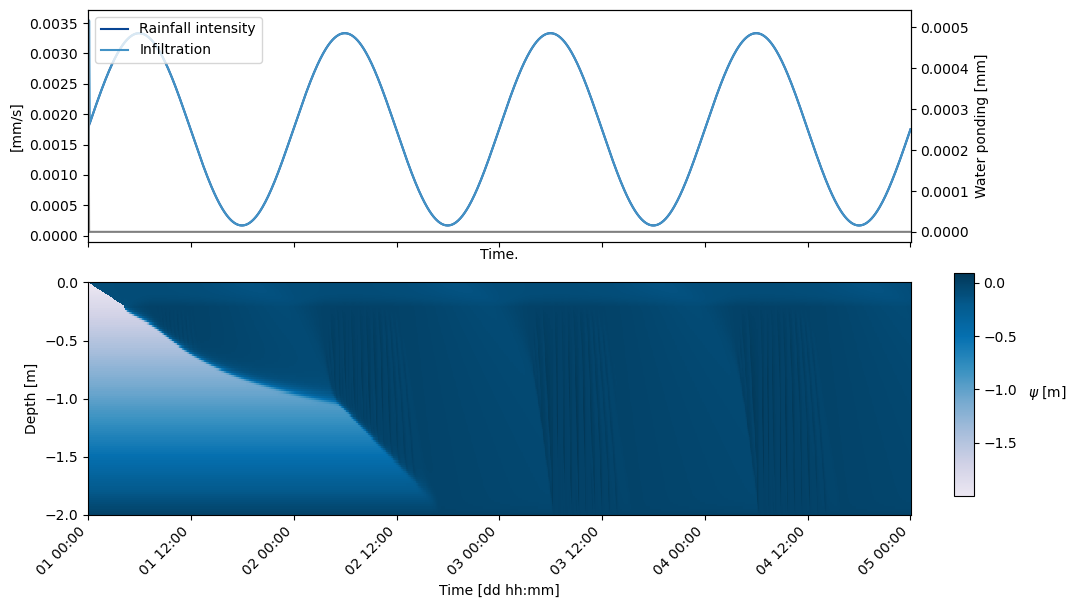

In [13]:
start = '2022-01-01 00:00'
end = '2022-01-05 00:00'

fig, ax = plt.subplots(2, 1, sharex='col', figsize=(10, 10/1.618)) 
norm = matplotlib.colors.Normalize(vmin=np.amin(ds.psi.values), vmax=np.amax(ds.psi.values))

ax[0].plot(ds.time.sel(time=slice(start,end)), rain['0'][start:end]/300,  color='#084594', label='Rainfall intensity')
(-ds.darcyVelocity.sel(dualDepth=0, method='nearest')*1000).plot(ax=ax[0], color='#4292c6', label='Infiltration')

ax[0].set_ylabel('[mm/s]')
ax[0].set_title(None)
ax[0].legend(loc='upper left')

ax1=ax[0].twinx()
ds.waterVolume.sel(time=slice(start,end)).sel(depth=0.0, method='nearest').plot(ax=ax1,color='0.5')
ax1.set_ylabel('Water ponding [mm]')
ax1.set_title(None)


a = ds.psi.sel(time=slice(start,end)).plot(ax=ax[1], y='depth',add_colorbar=False, cmap=my_cmap, norm=norm)#, cbar_kwargs={'label': '$\psi$ [m]'})

ax[1].set_ylabel('Depth [m]')
ax[1].set_xlabel('Time [dd hh:mm]')


ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax[1].xaxis.set_tick_params(rotation=45)

cbar_ax = fig.add_axes([0.95, 0.19, 0.02, 0.36])
sm = plt.cm.ScalarMappable(cmap=my_cmap, norm=norm)
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label('$\\psi$ [m]', rotation=0, labelpad=22)

plt.tight_layout()
plt.show()

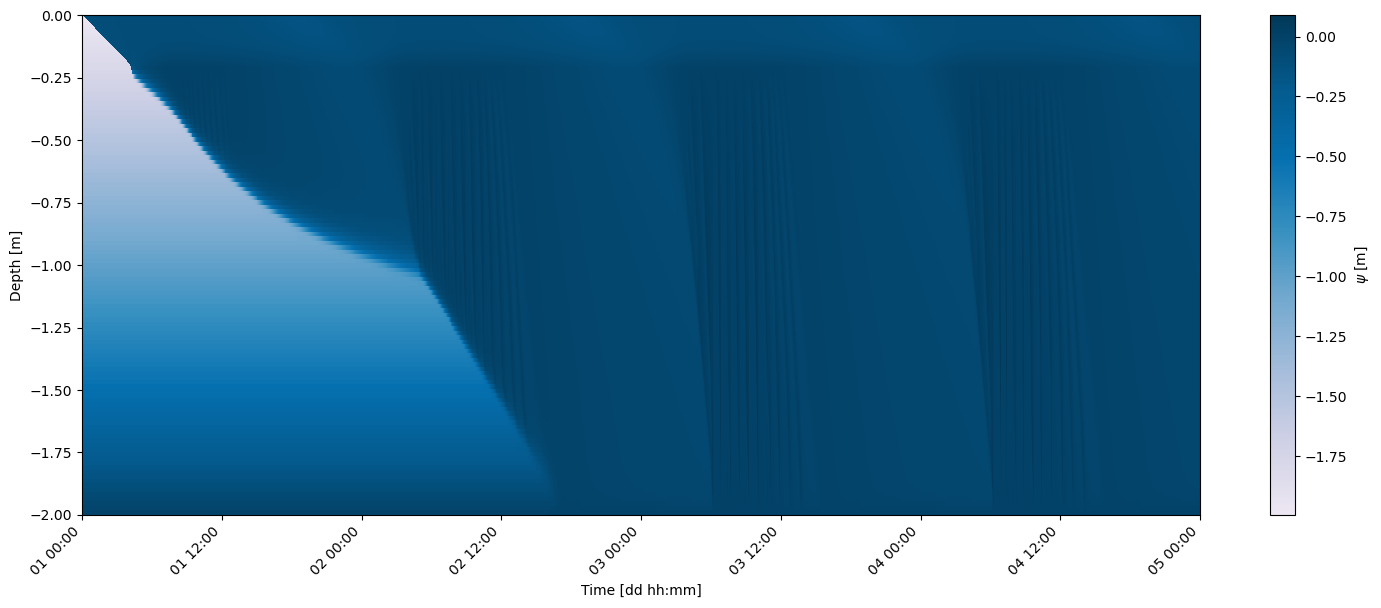

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10/1.618)) 
norm = matplotlib.colors.Normalize(vmin=np.amin(ds.psi.values), vmax=np.amax(ds.psi.values))

a = ds.psi.plot(ax=ax, y='depth',add_colorbar=True, cmap=my_cmap, norm=norm, cbar_kwargs={'label': '$\psi$ [m]'})

ax.set_ylabel('Depth [m]')
ax.set_xlabel('Time [dd hh:mm]')


ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax.xaxis.set_tick_params(rotation=45)

plt.tight_layout()
plt.show()

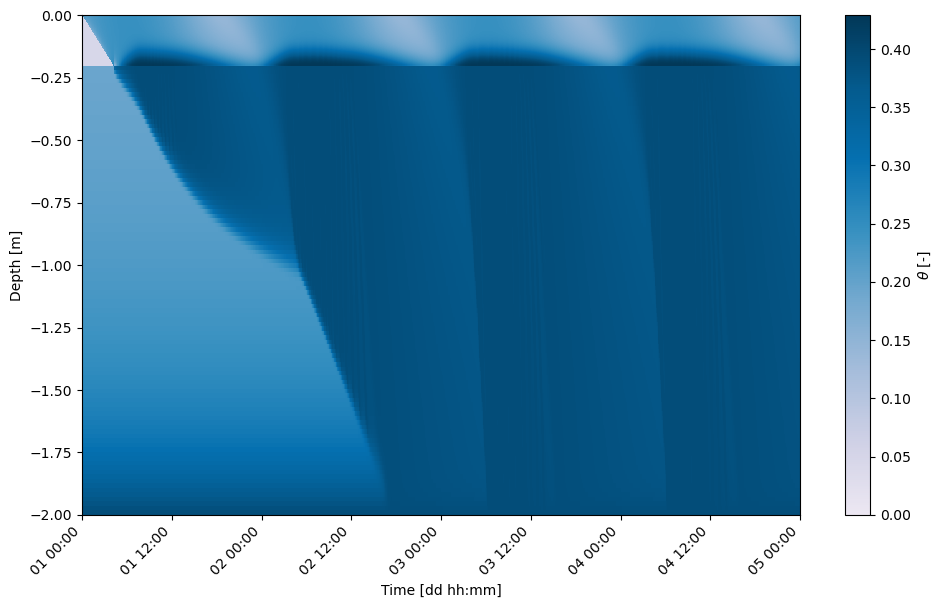

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10/1.618)) 
norm = matplotlib.colors.Normalize(vmin=np.amin(ds.theta.values), vmax=np.amax(ds.theta.values))

a = ds.theta.plot(ax=ax, y='depth',add_colorbar=True, cmap=my_cmap, norm=norm, cbar_kwargs={'label': '$\\theta$ [-]'})

ax.set_ylabel('Depth [m]')
ax.set_xlabel('Time [dd hh:mm]')


ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax.xaxis.set_tick_params(rotation=45)

plt.tight_layout()
plt.show()

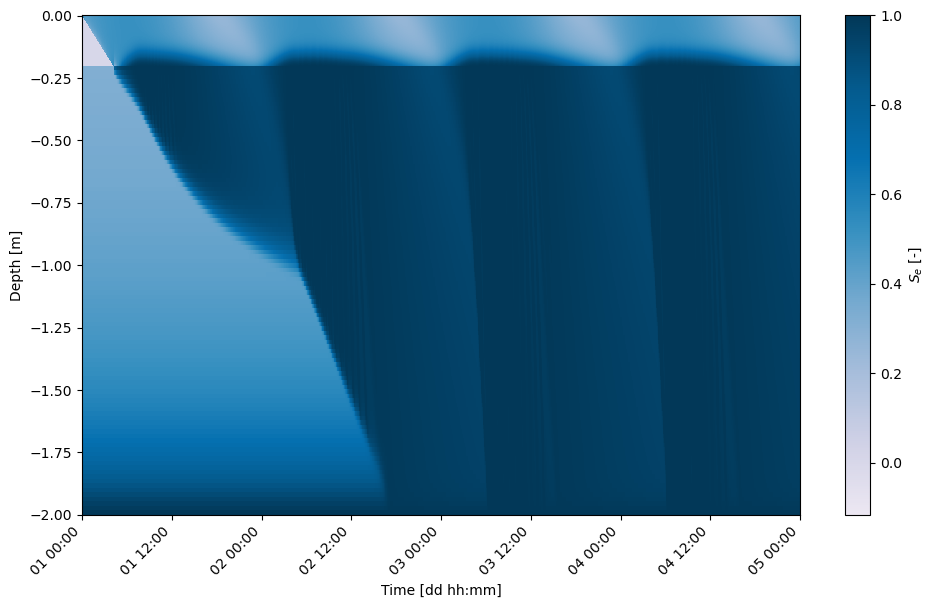

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10/1.618)) 
norm = matplotlib.colors.Normalize(vmin=np.amin(ds.saturationDegree.values), vmax=np.amax(ds.saturationDegree.values))

a = ds.saturationDegree.plot(ax=ax, y='depth',add_colorbar=True, cmap=my_cmap, norm=norm, cbar_kwargs={'label': '$S_e$ [-]'})

ax.set_ylabel('Depth [m]')
ax.set_xlabel('Time [dd hh:mm]')


ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax.xaxis.set_tick_params(rotation=45)

plt.tight_layout()
plt.show()

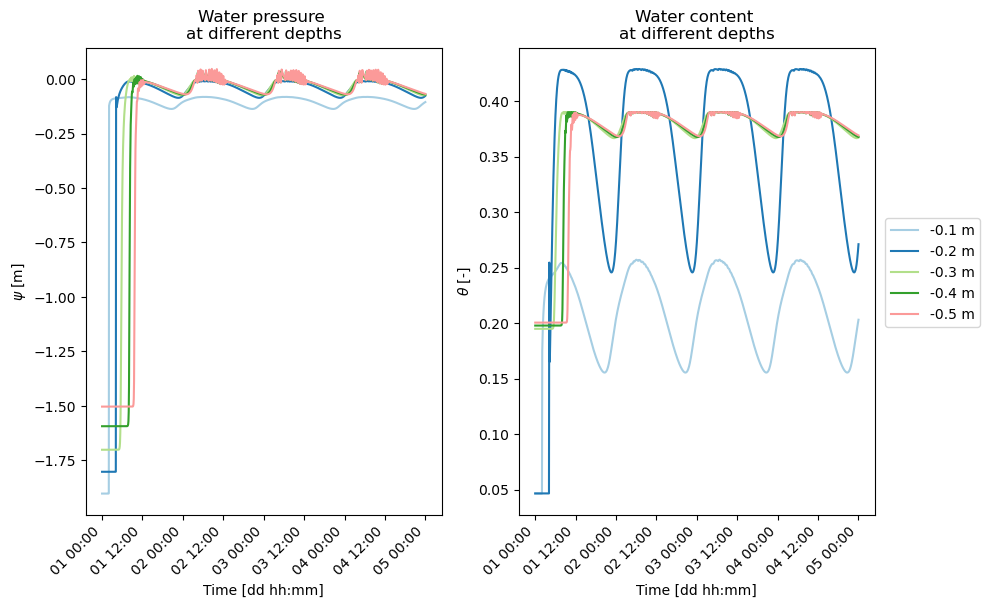

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10/1.618)) 

ds.psi.sel(depth=-0.1, method='nearest').plot(ax=ax1, color=colors[0])
ds.psi.sel(depth=-0.2, method='nearest').plot(ax=ax1, color=colors[1])
ds.psi.sel(depth=-0.3, method='nearest').plot(ax=ax1, color=colors[2])
ds.psi.sel(depth=-0.4, method='nearest').plot(ax=ax1, color=colors[3])
ds.psi.sel(depth=-0.5, method='nearest').plot(ax=ax1, color=colors[4])

ax1.set_title('Water pressure \nat different depths')


ax1.set_ylabel('$\psi$ [m]')
ax1.set_xlabel('Time [dd hh:mm]')

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax1.xaxis.set_tick_params(rotation=45)

ds.theta.sel(depth=-0.1, method='nearest').plot(ax=ax2, label = '-0.1 m', color=colors[0])
ds.theta.sel(depth=-0.2, method='nearest').plot(ax=ax2, label = '-0.2 m', color=colors[1])
ds.theta.sel(depth=-0.3, method='nearest').plot(ax=ax2, label = '-0.3 m', color=colors[2])
ds.theta.sel(depth=-0.4, method='nearest').plot(ax=ax2, label = '-0.4 m', color=colors[3])
ds.theta.sel(depth=-0.5, method='nearest').plot(ax=ax2, label = '-0.5 m', color=colors[4])

ax2.set_title('Water content \nat different depths')


ax2.set_ylabel('$\\theta$ [-]')
ax2.set_xlabel('Time [dd hh:mm]')

ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax2.xaxis.set_tick_params(rotation=45)

ax2.legend(bbox_to_anchor=(1.01,0.65), ncol=1)

plt.tight_layout()
plt.show()

In [18]:
from datetime import datetime,timedelta
from dateutil.relativedelta import relativedelta, MO
times=[]
start_date='2022-01-01 00:00'
start_date=datetime.strptime(start_date, '%Y-%m-%d %H:%M')

In [19]:
for i in range(5):
    delta=relativedelta(days=+i)
    times.append(start_date+delta)
    
times

[datetime.datetime(2022, 1, 1, 0, 0),
 datetime.datetime(2022, 1, 2, 0, 0),
 datetime.datetime(2022, 1, 3, 0, 0),
 datetime.datetime(2022, 1, 4, 0, 0),
 datetime.datetime(2022, 1, 5, 0, 0)]

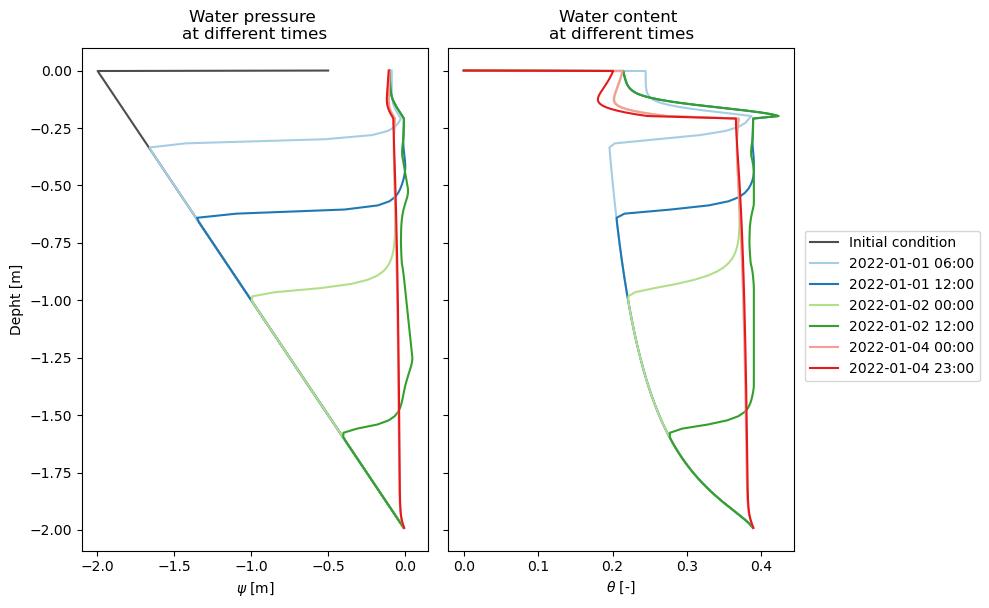

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey='row', figsize=(10, 10/1.618)) 

ds.psiIC.plot(ax=ax1, y='depth', label='Initial condition', color='0.3')

ds.psi.sel(time='2022-01-01 06:00').plot(ax=ax1, y='depth', label='2022-01-01 06:00', color=colors[0])
ds.psi.sel(time='2022-01-01 12:00').plot(ax=ax1, y='depth', label='2022-01-01 12:00', color=colors[1])
ds.psi.sel(time='2022-01-02 00:00').plot(ax=ax1, y='depth', label='2022-01-02 00:00', color=colors[2])
ds.psi.sel(time='2022-01-02 12:00').plot(ax=ax1, y='depth', label='2022-01-02 12:00', color=colors[3])
ds.psi.sel(time='2022-01-04 00:00').plot(ax=ax1, y='depth', label='2022-01-04 00:00', color=colors[4])
ds.psi.sel(time='2022-01-04 23:00').plot(ax=ax1, y='depth', label='2022-01-04 23:00', color=colors[5])

#ds.psi.sel(time=slice('2022-01-01 00:00','2022-01-05 00:00')).plot(ax=ax1, y='depth',label=times)

ax1.set_title('Water pressure \nat different times')

ax1.set_ylabel('Depht [m]')
ax1.set_xlabel('$\psi$ [m]')

# ds.psiIC.plot(y='depth', label='Initial condition', color='0.3')

plt.plot(np.nan, np.nan, label='Initial condition', color='0.3')

ds.theta.sel(time='2022-01-01 06:00').plot(ax=ax2, y='depth', label='2022-01-01 06:00', color=colors[0])
ds.theta.sel(time='2022-01-01 12:00').plot(ax=ax2, y='depth', label='2022-01-01 12:00', color=colors[1])
ds.theta.sel(time='2022-01-02 00:00').plot(ax=ax2, y='depth', label='2022-01-02 00:00', color=colors[2])
ds.theta.sel(time='2022-01-02 12:00').plot(ax=ax2, y='depth', label='2022-01-02 12:00', color=colors[3])
ds.theta.sel(time='2022-01-04 00:00').plot(ax=ax2, y='depth', label='2022-01-04 00:00', color=colors[4])
ds.theta.sel(time='2022-01-04 23:00').plot(ax=ax2, y='depth', label='2022-01-04 23:00', color=colors[5])

#times=slice('2022-01-01 00:00','2022-01-05 00:00')
#ds.theta.sel(time=slice('2022-01-01 00:00','2022-01-05 00:00')).plot(ax=ax2,y='depth',label=slice('2022-01-01 00:00','2022-01-05 00:00'))

ax2.set_title('Water content \nat different times')

ax2.set_ylabel('')
ax2.set_xlabel('$\\theta$ [-]')


ax2.legend(bbox_to_anchor=(1.01,0.65), ncol=1)

plt.tight_layout()
plt.show()

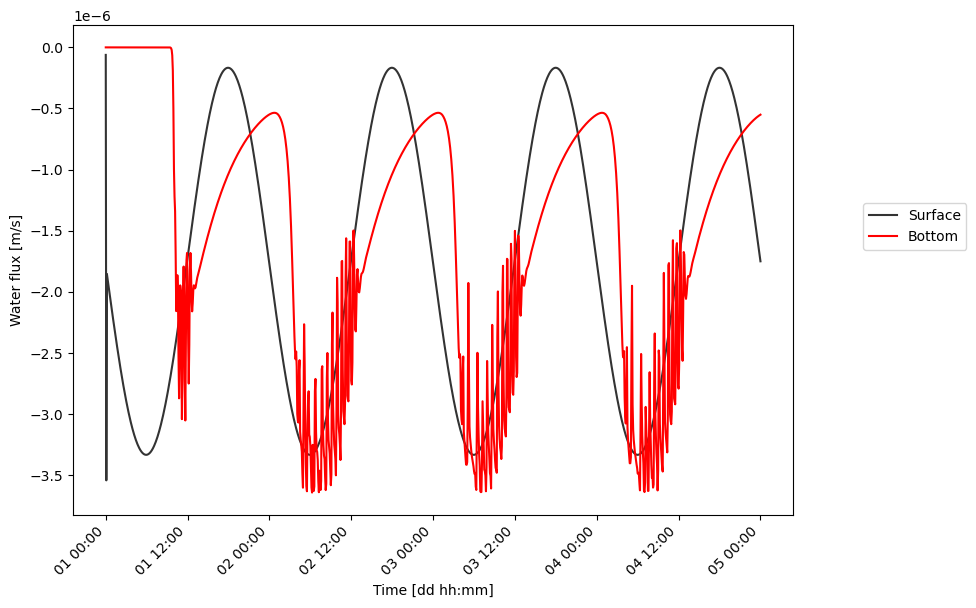

In [21]:
fig, ax= plt.subplots(1, 1, figsize=(10, 10/1.618)) 

ds.darcyVelocity.sel(dualDepth=0, method='nearest').plot(ax=ax, label='Surface', color='0.2')
ds.darcyVelocity.sel(dualDepth=-0.5, method='nearest').plot(ax=ax, label='Bottom', color='red')


ax.set_title('')

ax.set_ylabel('Water flux [m/s]')

ax.set_xlabel('Time [dd hh:mm]')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax.xaxis.set_tick_params(rotation=45)

ax.legend(bbox_to_anchor=(1.25,0.65), ncol=1)

plt.tight_layout()
plt.show()

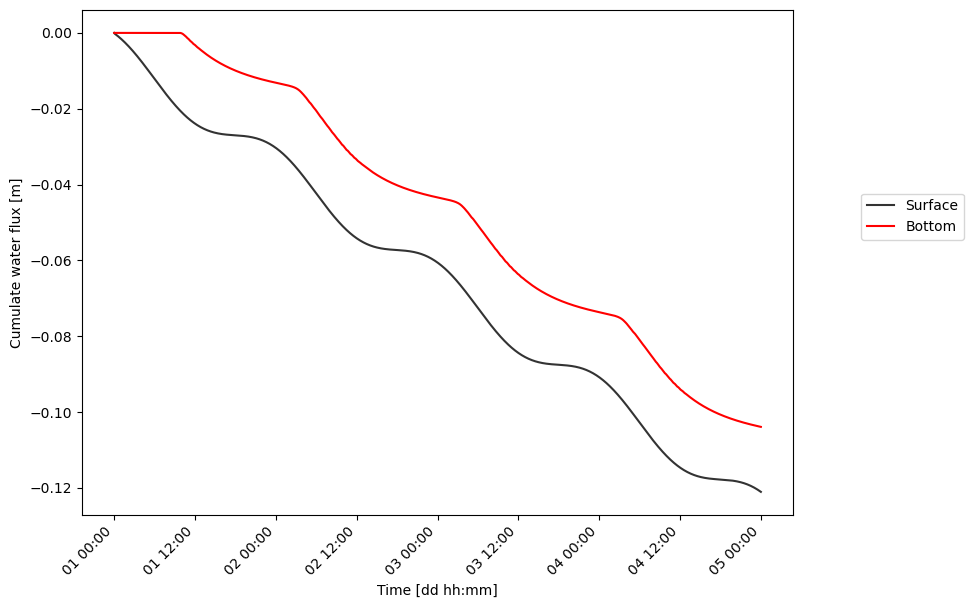

In [22]:
fig, ax= plt.subplots(1, 1, figsize=(10, 10/1.618)) 

(ds.darcyVelocity.sel(dualDepth=0, method='nearest')*60).cumsum().plot(ax=ax, label='Surface', color='0.2')
(ds.darcyVelocity.sel(dualDepth=-0.5, method='nearest')*60).cumsum().plot(ax=ax, label='Bottom', color='red')


ax.set_title('')

ax.set_ylabel('Cumulate water flux [m]')

ax.set_xlabel('Time [dd hh:mm]')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax.xaxis.set_tick_params(rotation=45)

ax.legend(bbox_to_anchor=(1.25,0.65), ncol=1)

plt.tight_layout()
plt.show()

In [23]:
ds

<xarray.Dataset>
Dimensions:           (depth: 151, dualDepth: 151, time: 1153)
Coordinates:
  * depth             (depth) float64 -1.991 -1.973 -1.955 ... -0.006 -0.002 0.0
  * dualDepth         (dualDepth) float64 -2.0 -1.982 -1.964 ... -0.004 0.0
  * time              (time) datetime64[ns] 2022-01-01 ... 2022-01-05
Data variables:
    psi               (time, depth) float64 -0.009 -0.027 ... -0.1006 -0.1005
    psiIC             (depth) float64 ...
    T                 (depth) float64 ...
    theta             (time, depth) float64 0.3888 0.3841 0.3779 ... 0.2132 0.0
    saturationDegree  (time, depth) float64 0.9958 0.9795 ... 0.4369 -0.1169
    darcyVelocity     (time, dualDepth) float64 ...
    waterVolume       (time, depth) float64 ...
    error             (time) float64 ...
    topBC             (time) float64 ...
    bottomBC          (time) float64 ...
    runOff            (time) float64 ...
    controlVolume     (depth) float64 ...
Attributes:
    Description_of_the_problem:         WHETGEO-1D ex03 wet initial condition.
    Top_boundary_condition:             Top Coupled
    Bottom_boundary_condition:          Bottom Dirichlet
    path_top_boundary_condition:        C:\Users\super\OMS_Project_WHETGEO1D_...
    path_bottom_boundary_condition:     C:\Users\super\OMS_Project_WHETGEO1D_...
    path_grid:                          C:\Users\super\OMS_Project_WHETGEO1D_...
    time_delta:                          
    swrc_model:                         {Water Depth,Van Genuchten}
    soil_hydraulic_conductivity_model:  {null,Mualem Van Genuchten}
    interface_conductivity_model:       max